#LAB 3 MODELOS DE MACHINE LEARNING - ARBOL DE DECICSION

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/lalvarenga90/Dataset-para-AI/main/COVID-19%20Global%20Statistics%20Dataset.csv')
data.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"


In [17]:
# Revisa los nombres de las columnas y elige las relevantes
print(data.columns)


# Elige columnas relevantes para el modelo (esto es solo un ejemplo, ajusta según el dataset)
selected_columns = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases']
data = data[selected_columns]

data = data.replace({',': ''}, regex=True)
data[selected_columns] = data[selected_columns].apply(pd.to_numeric)


# Manejo de valores nulos
data = data.dropna()

# Normalización o estandarización si es necesario
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Asumiendo que quieres predecir 'ActiveCases' (esto es solo un ejemplo)
X = data_scaled[:, :-1]
y = data_scaled[:, -1] > np.median(data_scaled[:, -1])  # Convertir a binario

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Index(['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases'], dtype='object')


In [18]:
#Entrenar el Modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
#EVALUAMOS EL MODELO
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5178571428571429
Classification Report:
              precision    recall  f1-score   support

       False       0.58      0.56      0.57        32
        True       0.44      0.46      0.45        24

    accuracy                           0.52        56
   macro avg       0.51      0.51      0.51        56
weighted avg       0.52      0.52      0.52        56

Confusion Matrix:
[[18 14]
 [13 11]]


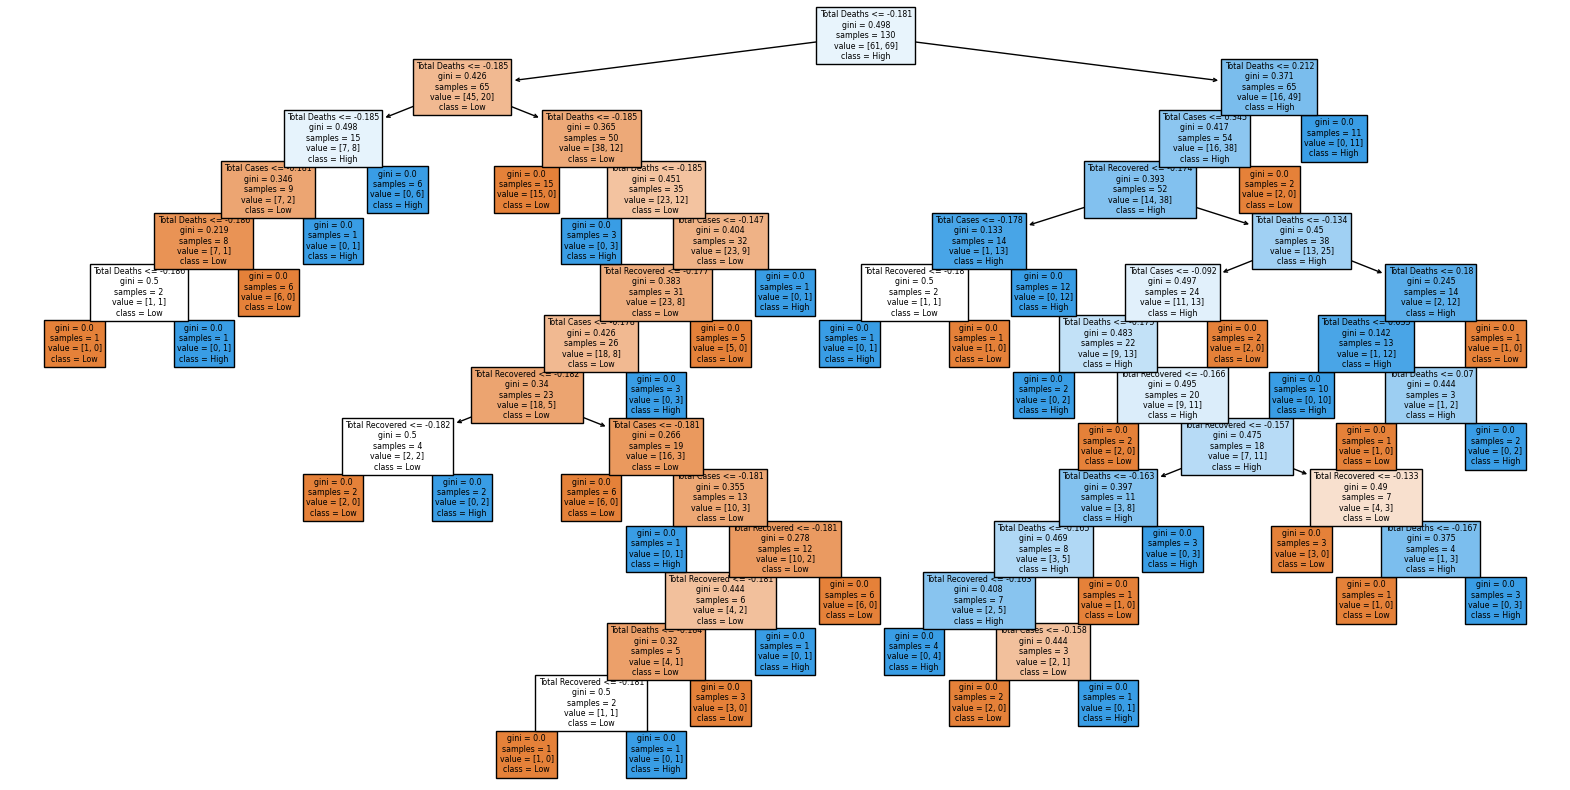

In [20]:
#Visualizar el Árbol de Decisión
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=selected_columns[:-1], class_names=['Low', 'High'])
plt.show()